In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_dict = {
    "test": {
        "C-syn": pd.read_csv("TEST_C-synthetic_data-072323.csv"),
        "CH-syn": pd.read_csv("TEST_CH-synthetic_data-072323.csv"),
        "C": pd.read_csv("C-X_test_15.csv"),
        "CH": pd.read_csv("CH-X_test_15.csv")
    },
    "train":{
        "C-syn": pd.read_csv("TRAIN_C-synthetic_data-072323.csv"),
        "CH-syn": pd.read_csv("TRAIN_CH-synthetic_data-072323.csv"),
        "C": pd.read_csv("C-X_train_15.csv"),
        "CH": pd.read_csv("CH-X_train_15.csv")
    }
}

teals = ["#d1eeea","#a8dbd9","#85c4c9","#68abb8","#4f90a6","#3b738f","#2a5674"]
greyscale= ["#D4D4D4", "#B4B4B4", "#909090", "#636363", "#494848"]
ACCENT = teals[-3]
GREY = greyscale[-4]

COLORS = {"C": GREY, "CH": ACCENT}
RESPONSES = ["ACTIVITY", "GROWTH", "CYCLES", "SYMMETRY", "EDGE_FRACTION"] 
IDENTIFIERS = ['LAYOUT', 'SEED']
C_FEATURES = ['RADIUS', 
'LENGTH', 'WALL', 'SHEAR', 'CIRCUM', 'FLOW', 'NODES', 'EDGES',
'GRADIUS', 'GDIAMETER', 'AVG_ECCENTRICITY', 'AVG_SHORTEST_PATH',
'AVG_CLOSENESS', 'AVG_BETWEENNESS', 'AVG_IN_DEGREES', 'AVG_OUT_DEGREES',
'AVG_DEGREE', 'AVG_CLUSTERING', 'AVG_CORENESS',
'GRADIUS:FLOW', 'GDIAMETER:FLOW',
'AVG_ECCENTRICITY:FLOW', 'AVG_SHORTEST_PATH:FLOW', 'AVG_CLOSENESS:FLOW',
'AVG_BETWEENNESS:FLOW', 'GRADIUS:WALL', 'GDIAMETER:WALL',
'AVG_ECCENTRICITY:WALL', 'AVG_SHORTEST_PATH:WALL', 'AVG_CLOSENESS:WALL',
'AVG_BETWEENNESS:WALL', 'GRADIUS:SHEAR', 'GDIAMETER:SHEAR',
'AVG_ECCENTRICITY:SHEAR', 'AVG_SHORTEST_PATH:SHEAR',
'AVG_CLOSENESS:SHEAR', 'GRADIUS:RADIUS', 'GDIAMETER:RADIUS',
'AVG_ECCENTRICITY:RADIUS', 'AVG_SHORTEST_PATH:RADIUS',
'AVG_CLOSENESS:RADIUS', 'AVG_BETWEENNESS:RADIUS',
'GRADIUS:PRESSURE_AVG', 'GDIAMETER:PRESSURE_AVG',
'AVG_ECCENTRICITY:PRESSURE_AVG', 'AVG_SHORTEST_PATH:PRESSURE_AVG',
'AVG_CLOSENESS:PRESSURE_AVG', 'AVG_BETWEENNESS:PRESSURE_AVG',
'GRADIUS:PRESSURE_DELTA', 'GDIAMETER:PRESSURE_DELTA',
'AVG_ECCENTRICITY:PRESSURE_DELTA', 'AVG_SHORTEST_PATH:PRESSURE_DELTA',
'AVG_CLOSENESS:PRESSURE_DELTA', 'GRADIUS:OXYGEN_AVG',
'GDIAMETER:OXYGEN_AVG', 'AVG_ECCENTRICITY:OXYGEN_AVG',
'AVG_SHORTEST_PATH:OXYGEN_AVG', 'AVG_CLOSENESS:OXYGEN_AVG',
'AVG_BETWEENNESS:OXYGEN_AVG', 'GRADIUS:OXYGEN_DELTA',
'GDIAMETER:OXYGEN_DELTA', 'AVG_ECCENTRICITY:OXYGEN_DELTA',
'AVG_SHORTEST_PATH:OXYGEN_DELTA', 'AVG_CLOSENESS:OXYGEN_DELTA']
CH_FEATURES = ['RADIUS', 
'LENGTH', 'WALL', 'SHEAR', 'CIRCUM', 'FLOW', 'NODES', 'EDGES',
'GRADIUS', 'GDIAMETER', 'AVG_ECCENTRICITY', 'AVG_SHORTEST_PATH',
'AVG_CLOSENESS', 'AVG_BETWEENNESS', 'AVG_IN_DEGREES', 'AVG_OUT_DEGREES',
'AVG_DEGREE', 'AVG_CLUSTERING', 'AVG_CORENESS',
'GRADIUS:WALL', 'GDIAMETER:WALL',
'AVG_ECCENTRICITY:WALL', 'AVG_SHORTEST_PATH:WALL', 'AVG_CLOSENESS:WALL',
'AVG_BETWEENNESS:WALL', 'GRADIUS:SHEAR', 'GDIAMETER:SHEAR',
'AVG_ECCENTRICITY:SHEAR', 'AVG_SHORTEST_PATH:SHEAR',
'AVG_CLOSENESS:SHEAR', 'GRADIUS:RADIUS', 'GDIAMETER:RADIUS',
'AVG_ECCENTRICITY:RADIUS', 'AVG_SHORTEST_PATH:RADIUS',
'AVG_CLOSENESS:RADIUS', 'AVG_BETWEENNESS:RADIUS',
'GRADIUS:PRESSURE_AVG', 'GDIAMETER:PRESSURE_AVG',
'AVG_ECCENTRICITY:PRESSURE_AVG', 'AVG_SHORTEST_PATH:PRESSURE_AVG',
'AVG_CLOSENESS:PRESSURE_AVG', 'AVG_BETWEENNESS:PRESSURE_AVG',
'GRADIUS:PRESSURE_DELTA', 'GDIAMETER:PRESSURE_DELTA',
'AVG_ECCENTRICITY:PRESSURE_DELTA', 'AVG_SHORTEST_PATH:PRESSURE_DELTA',
'AVG_CLOSENESS:PRESSURE_DELTA', 'GRADIUS:OXYGEN_AVG',
'GDIAMETER:OXYGEN_AVG', 'AVG_ECCENTRICITY:OXYGEN_AVG',
'AVG_SHORTEST_PATH:OXYGEN_AVG', 'AVG_CLOSENESS:OXYGEN_AVG',
'AVG_BETWEENNESS:OXYGEN_AVG', 'GRADIUS:OXYGEN_DELTA',
'GDIAMETER:OXYGEN_DELTA', 'AVG_ECCENTRICITY:OXYGEN_DELTA',
'AVG_SHORTEST_PATH:OXYGEN_DELTA', 'AVG_CLOSENESS:OXYGEN_DELTA']

NEW = ["CONTEXT", "SYNTHETIC", "SPLIT"]

In [3]:
dfs = []
for split, split_dict in df_dict.items():
    for context, context_df in split_dict.items():
        if "CH" in context:
            temp_df = pd.DataFrame(context_df[CH_FEATURES+IDENTIFIERS]) 
            temp_df["CONTEXT"] = "CH"
        else:                      
            temp_df = pd.DataFrame(context_df[C_FEATURES+IDENTIFIERS])
            temp_df["CONTEXT"] = "C"

        if "syn" in context:
            temp_df["SYNTHETIC"] = 1
        else:
            temp_df["SYNTHETIC"] = 0
        
        temp_df["SPLIT"] = split
        dfs.append(temp_df)

final_df = pd.concat(dfs, axis=0)
final_df.set_index(NEW + IDENTIFIERS, inplace=True)
final_df

RADIUS    LENGTH      WALL     SHEAR  \
CONTEXT SYNTHETIC SPLIT LAYOUT SEED                                           
C       1         test  Lav    79   -0.465456  1.158036  2.328047 -1.460871   
                               56   -0.342868  1.422277  3.058263 -1.752786   
                        Lvav   76    0.518520  1.243057 -0.746118  0.060408   
                               91    0.249248  1.135216 -1.383708  0.188171   
                        Lav    64   -1.106819  0.923608  0.838728 -1.570545   
...                                       ...       ...       ...       ...   
CH      0         train Lava   8    -0.899182  1.000000 -0.192799 -0.393549   
                        Lvav   76   -0.041167  1.000000  0.490752  0.510431   
                        Sav    57    0.765152  1.000000 -0.288000  0.256223   
                        Savav  48   -0.936084  1.000000 -0.717315 -0.091285   
                        Lava   4    -1.505930  1.000000 -0.751213 -1.005462   

                                       CIRCUM      FLOW     NODES     EDGES  \
CONTEXT SYNTHETIC SPLIT LAYOUT SEED                                           
C       1         test  Lav    79   -1.520109 -1.222238 -1.438334 -1.496492   
                               56   -1.773616 -1.382673 -1.702821 -1.773932   
                        Lvav   76    0.947902  0.142794  0.095371  0.083306   
                               91    1.025320  0.125627  0.229108  0.261015   
                        Lav    64   -1.350021 -1.399415 -1.253986 -1.233663   
...                                       ...       ...       ...       ...   
CH      0         train Lava   8    -0.959835 -0.810842  0.056597  0.033030   
                        Lvav   76    0.253904  0.040059 -0.167799 -0.170704   
                        Sav    57   -0.080246  0.573774 -0.198869 -0.229312   
                        Savav  48   -0.457348 -0.448201  1.095723  1.099146   
                        Lava   4    -1.211521 -0.936834  0.146355  0.141874   

                                      GRADIUS  GDIAMETER  ...  \
CONTEXT SYNTHETIC SPLIT LAYOUT SEED                       ...   
C       1         test  Lav    79    0.014617  -1.077564  ...   
                               56    0.368153  -0.549572  ...   
                        Lvav   76    0.643840   1.504944  ...   
                               91   -0.168510   0.446578  ...   
                        Lav    64    0.097512  -0.014046  ...   
...                                       ...        ...  ...   
CH      0         train Lava   8    -0.545345   0.204754  ...   
                        Lvav   76    0.911052   1.426975  ...   
                        Sav    57   -1.585629  -1.323022  ...   
                        Savav  48    2.367449   0.510309  ...   
                        Lava   4    -0.129231   1.274197  ...   

                                     GDIAMETER:OXYGEN_AVG  \
CONTEXT SYNTHETIC SPLIT LAYOUT SEED                         
C       1         test  Lav    79               -1.595568   
                               56               -1.154677   
                        Lvav   76                1.900764   
                               91                0.751595   
                        Lav    64               -0.604474   
...                                                   ...   
CH      0         train Lava   8                -0.772131   
                        Lvav   76                1.449787   
                        Sav    57               -0.532467   
                        Savav  48                0.036356   
                        Lava   4                -0.067269   

                                     AVG_ECCENTRICITY:OXYGEN_AVG  \
CONTEXT SYNTHETIC SPLIT LAYOUT SEED                                
C       1         test  Lav    79                      -1.430680   
                               56                      -1.201119   
                        Lvav   76                       1.582131   
   

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

def PerformPCA(X, context, n_dimensions=10, plot=True):
    """
    Uses sklearn PCA tool to perform PCA
    input:
    X: Pandas Dataframe or Numpy Array of features
    n_dimensions: Number of PCs to fit
    
    output:
    X_pca: Pandas dataframe with column titles of PC1,...,PCn
    """
    TITLE_FONT = 20
    LABEL_FONT = 16
    pca = PCA(n_components=n_dimensions)
    pca.fit(X)
    
    X_pca_array = pca.transform(X)
    column_names = ['PC{}'.format(i+1) for i in range(n_dimensions)] 
    X_pca = pd.DataFrame(X_pca_array, columns=column_names, index=X.index)
    print(column_names)
    print(np.cumsum(pca.explained_variance_ratio_))
    if plot:
        plt.plot(column_names, np.cumsum(pca.explained_variance_ratio_), 'o--')
        plt.title('Skree Plot', fontsize=TITLE_FONT)
        plt.xlabel('Number of PCs', fontsize=LABEL_FONT)
        plt.ylabel('Total Percent Variance Explained', fontsize=LABEL_FONT)
        plt.ylim(0,1)
        plt.show()
    return X_pca

C


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
[0.4624704  0.64067293 0.80357553 0.85153002 0.89380888 0.91470748
 0.92894527 0.94097121 0.95107385 0.95953132]


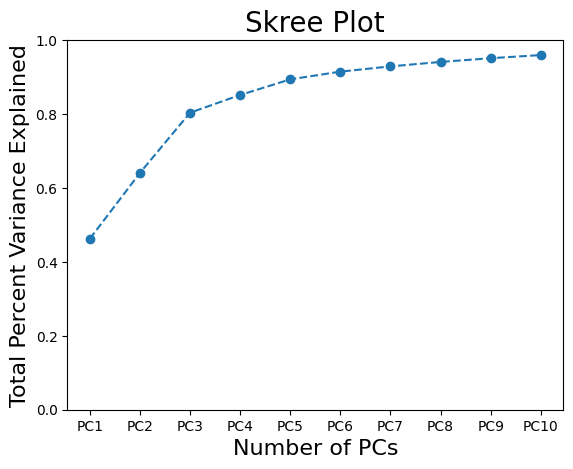

CH
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
[0.46860797 0.67328568 0.80984141 0.84586707 0.87509823 0.89939982
 0.91413235 0.92748079 0.9396987  0.94944897]


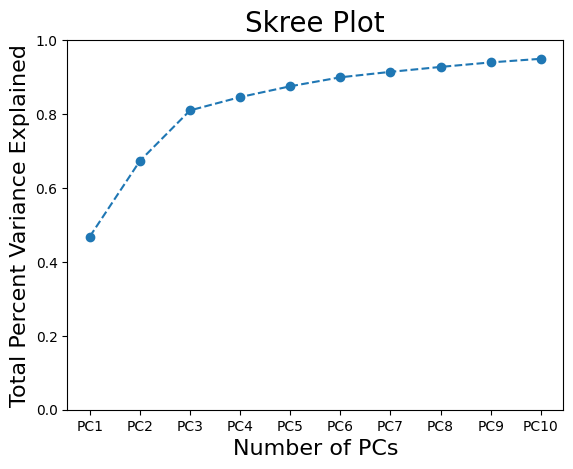

In [5]:

viz = {}
for context, context_df in final_df.groupby("CONTEXT"):
    if "CH" in context:
        print(context)
        viz[context] = PerformPCA(context_df[CH_FEATURES], context).reset_index()
    else:
        print(context)
        viz[context] = PerformPCA(context_df[C_FEATURES], context).reset_index()
    
    # viz[context] = pca.join(context_df[RESPONSES])    



In [6]:
viz["C"]

,CONTEXT,SYNTHETIC,SPLIT,LAYOUT,SEED,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,C,1,test,Lav,79,9.588603,1.299781,1.890056,-3.332342,0.217295,-0.245581,-0.200377,-0.264837,0.186044,0.360372
1,C,1,test,Lav,56,10.552308,3.179779,3.492151,-3.772584,0.966922,-0.406893,-0.156376,-0.667970,-0.418679,0.586335
2,C,1,test,Lvav,76,-3.608012,2.659877,3.213712,2.473099,-1.411020,-0.739126,-0.010281,-0.437423,-0.637192,0.139564
3,C,1,test,Lvav,91,-2.551713,-0.576523,0.514800,2.267323,-1.836900,-0.545171,-0.128606,-0.299958,-0.016224,-0.247858
4,C,1,test,Lav,64,8.026143,2.339767,0.387376,-0.772952,-0.260955,-0.595160,-0.718383,0.147014,-0.180278,-0.006503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,C,0,train,Lava,8,1.033822,1.276346,-3.082281,-0.106173,0.129437,0.346369,1.856795,-0.235364,-0.453733,0.243760
980,C,0,train,Lvav,74,-1.809363,-2.819857,0.247608,2.402359,-1.242061,-1.996999,1.475640,0.627882,-0.796767,0.318029
981,C,0,train,Sav,55,-0.837392,-2.002230,2.548909,-0.106742,0.507083,1.378241,0.623739,-0.421832,-0.250012,-1.098474
982,C,0,train,Savav,42,-6.818802,2.661171,-1.098018,-0.915208,-0.972400,0.701537,-0.547233,-1.431416,1.345408,0.534210


[]

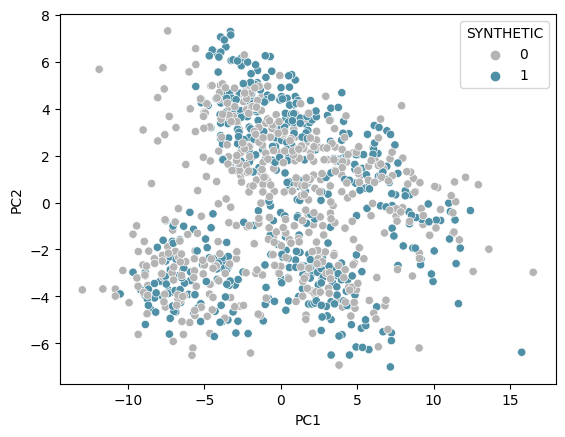

In [118]:
sns.scatterplot(viz["C"], x="PC1", y="PC2", hue="SYNTHETIC", hue_order=[0, 1], palette=[GREY, ACCENT])
plt.plot()

/var/folders/km/t7rply955cdgx67pfmsv62z80000gn/T/ipykernel_64113/1753446437.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn.drop(columns=["SYNTHETIC"], inplace=True)
/var/folders/km/t7rply955cdgx67pfmsv62z80000gn/T/ipykernel_64113/1753446437.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true.drop(columns=["SYNTHETIC"], inplace=True)


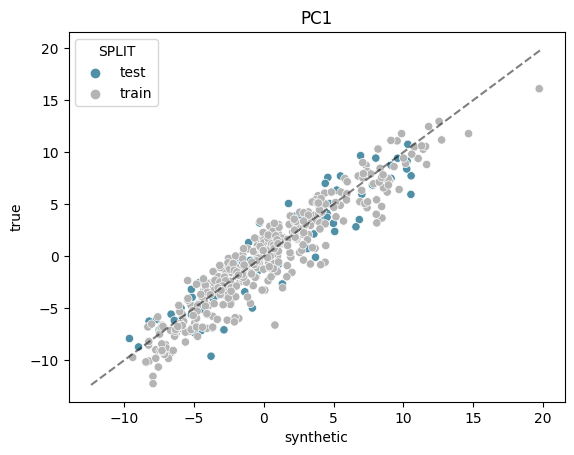

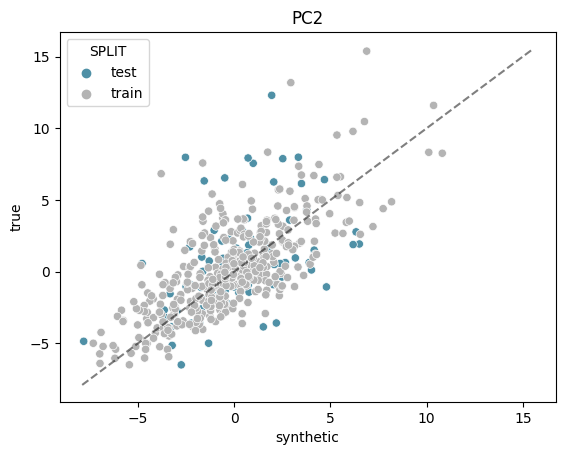

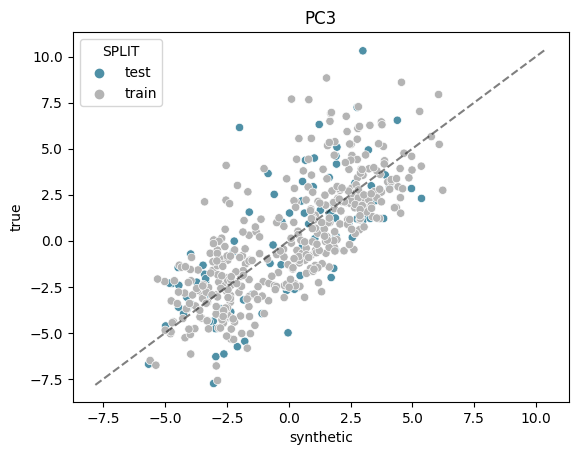

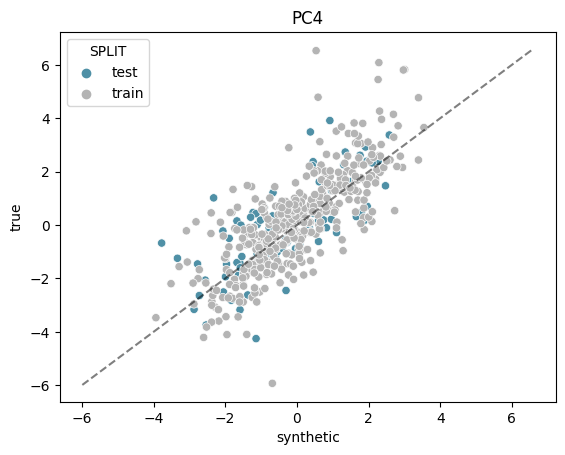

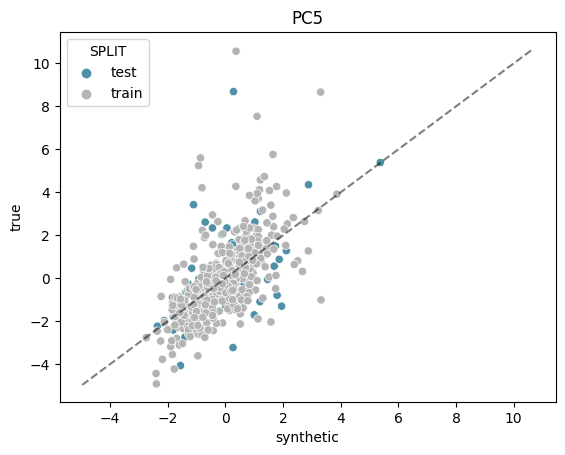

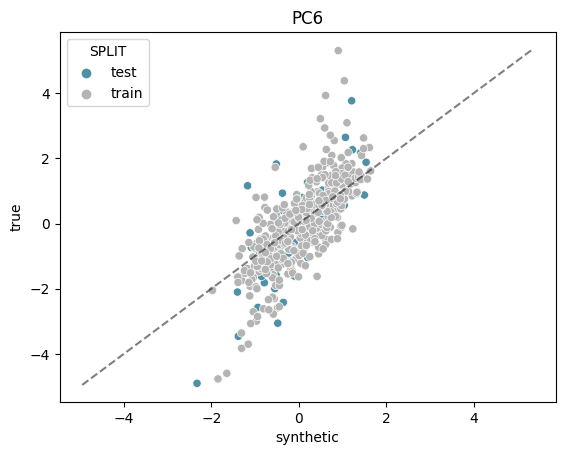

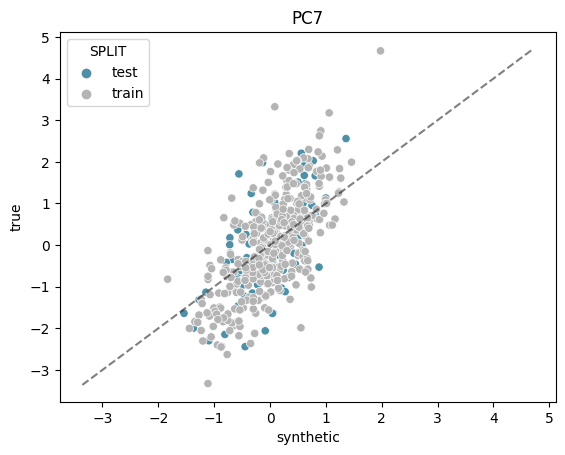

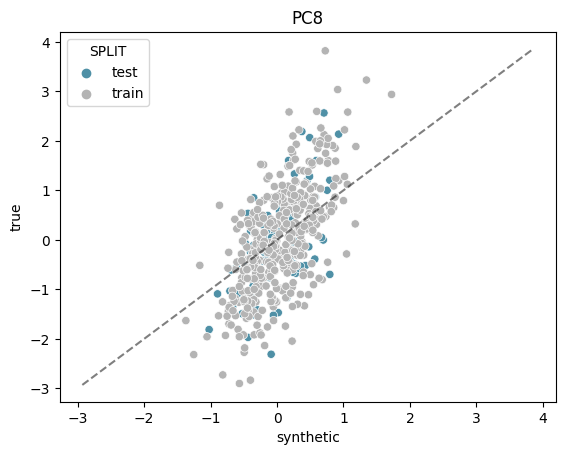

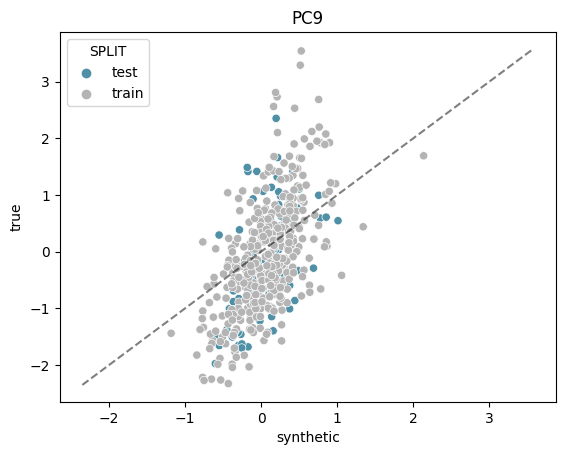

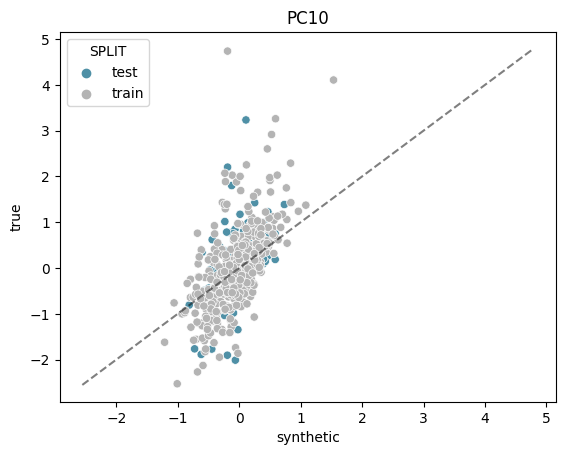

In [6]:
import numpy as np
from scipy.stats import pearsonr


#Include these in supplement

def visualize_pca(df):
    syn = df[df["SYNTHETIC"]==1]
    true = df[df["SYNTHETIC"]==0]
    syn.drop(columns=["SYNTHETIC"], inplace=True)
    true.drop(columns=["SYNTHETIC"], inplace=True)
    new = syn.merge(true, on=["CONTEXT", "LAYOUT", "SEED", "SPLIT"], how="inner", suffixes=("_syn", "_true"))
    new.to_csv("pca.csv")
    for i in range(10):

        plt.title(f"PC{i+1}")
        sns.scatterplot(new, x=f"PC{i+1}_syn", y=f"PC{i+1}_true", hue="SPLIT", hue_order=["test", "train"], palette=[ACCENT, GREY])
        plt.xlabel("synthetic")
        plt.ylabel("true")
        minimum = 1.01*min(new[f"PC{i+1}_syn"].min(), new[f"PC{i+1}_true"].min())
        maximum = 1.01*max(new[f"PC{i+1}_syn"].max(), new[f"PC{i+1}_true"].max())
        plt.plot([minimum, maximum], [minimum, maximum],"--k", alpha=.5)
        plt.show()
     

visualize_pca(viz["C"])
# visualize_pca(viz["CH"])

In [9]:
def visualize_correlation(viz_df):
    for context in ["C", "CH"]:
        df = viz_df[context]
        syn = df[df["SYNTHETIC"]==1]
        true = df[df["SYNTHETIC"]==0]

        C = syn.merge(true, on=["CONTEXT", "LAYOUT", "SEED", "SPLIT"], how="inner", suffixes=("_syn", "_true"))
        
        C_corr = [C[f"PC{i+1}_syn"].corr(C[f"PC{i+1}_true"])for i in range(10)]
        print(f"{context}: {C_corr}")

visualize_correlation(viz)


C: [0.9451700489645319, 0.6918309646531423, 0.7518660647440975, 0.7607014951136789, 0.6124212774151324, 0.7541475714781165, 0.6840400040520177, 0.633078911713509, 0.5959892361970184, 0.6077288659385691]
CH: [0.9598422737477877, 0.8801309083709936, 0.762988068481144, 0.798619333407305, 0.14362468086556326, 0.6333998614481329, 0.6589512541655291, 0.5868673623603061, 0.509918783954158, 0.5409127758075314]


In [12]:
PCs= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
var_C = [0.42949348, 0.61175084, 0.76128258, 0.82905798, 0.87139706, 0.89818725, 0.91729502, 0.9302268,  0.94144481, 0.95107121]
corr_C =[0.9175709737419012, 0.9278278856807686, 0.6575218793782562, 0.6729611171690331, 0.7580634634151657, 0.790042972624951, 0.5968737285748211, 0.6502090362623935, 0.6654902187092109, 0.3983115937346281]

var_CH = [0.44326906, 0.64473693, 0.78556585, 0.83573494, 0.86240666, 0.88832086, 0.90830012, 0.92041887, 0.93131412, 0.94184086]
corr_CH = [0.9294152227054439, 0.8730355682751019, 0.8111839956370996, 0.8056455845792266, 0.809481975073772, 0.0865486442446635, 0.6704075569145934, 0.533146475898389, 0.6482146772465611, 0.6529543096982144]

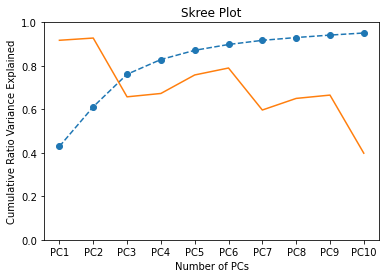

In [13]:
plt.plot(PCs, var_C, 'o--')
plt.plot(PCs, corr_C)
plt.title('Skree Plot')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Ratio Variance Explained')
plt.ylim(0,1)
plt.show()

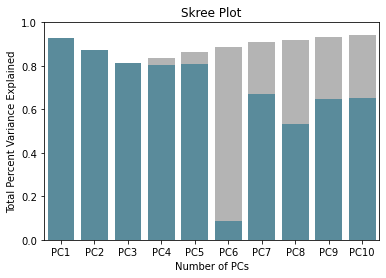

In [14]:
sns.barplot(x=PCs, y=var_CH, color=GREY)
sns.barplot(x=PCs, y=corr_CH, color=ACCENT)
plt.title('Skree Plot')
plt.xlabel('Number of PCs')
plt.ylabel('Total Percent Variance Explained')
plt.ylim(0,1)
plt.show()